# Using FinTDA for Financial Data Analysis
This repository hosts the Python package developed from the research presented in the paper 
"Topological Tail Dependence: Evidence from Forecasting Realized Volatility" 
(https://doi.org/10.1016/j.jfds.2023.100107) by Hugo Gobato Souto. The package is designed to implement 
the methodologies and techniques described in the paper, focusing on the application of topological data 
analysis to understand tail dependence in financial markets.

## Setup and Data Retrieval
Import Libraries: Import necessary libraries, including numpy, yfinance, and modules from the FinTDA package.

In [1]:
import numpy as np
import yfinance as yf
from fintda import FinTDA
%matplotlib inline

Define Financial Indexes and Date Range: Select the financial indexes and the date range for analysis.

In [2]:
index_names = ['^GSPC', '^DJI', '^RUT']  # S&P 500, Dow Jones, Russell 2000
start_date_string = "2000-01-01"
end_date_string = "2022-03-30"

Retrieve Data from Yahoo Finance: Use yfinance to download historical data for the specified indexes and date range.

In [3]:
raw_data = yf.download(index_names, start=start_date_string, end=end_date_string)

[*********************100%%**********************]  3 of 3 completed


3 Failed downloads:
['^RUT', '^GSPC', '^DJI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2000-01-01 -> 2022-03-30)')


Data Preprocessing: Focus on adjusted closing prices and compute logarithmic returns.

In [4]:
df_close = raw_data['Adj Close'].dropna(axis='rows')
returns = np.log(df_close.pct_change() + 1)
returns.dropna(inplace=True)

## Financial Time Series Analysis with FinTDA
Initialize FinTDA: Create an instance of FinTDA with the processed returns and predefined weights. If the weights are None, then the weights will be equal to 1/n, where n is the number of assets in the portfolio. Moreover, if the sum of the weights is not equal to 1, then the weights will be normalized to sum to 1.

In [4]:
weights = np.array([0.5, 0.3, 0.2])  # Define portfolio weights.
ftda = FinTDA(returns, weights)

NameError: name 'returns' is not defined

Compute Moving Persistence Diagrams: Use the compute_moving_dgm method to calculate persistence diagrams. This method is essential for analyzing the topological features of the financial time series data.

Computing Moving Diagrams:   0%|          | 0/5556 [00:00<?, ?it/s]

Computing Moving Diagrams: 100%|██████████| 5556/5556 [00:10<00:00, 505.55it/s]


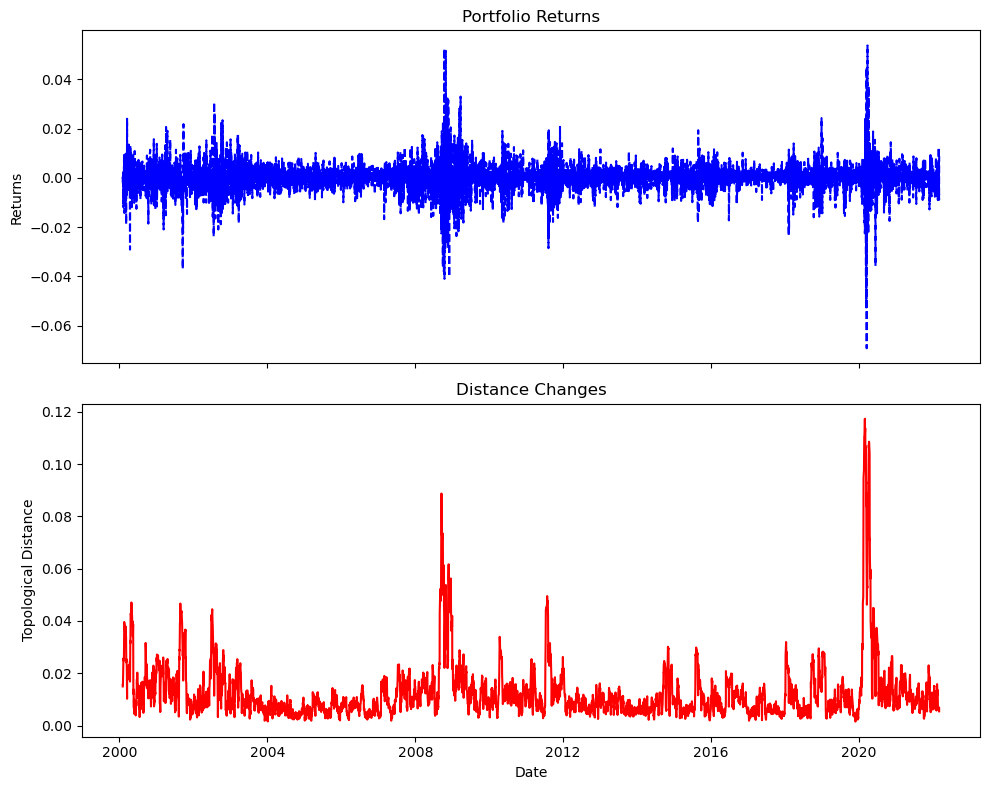

In [6]:
distance = ftda.compute_moving_dgm(plot=True)